In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [79]:
train = pd.read_csv('./train.csv',encoding='latin1' )
test = pd.read_csv('./test.csv', encoding='latin1')
address = pd.read_csv('./addresses.csv', encoding='latin1')
lat = pd.read_csv('./latlons.csv' ,encoding='latin1')

## Merging the Train dataset with address and lat

In [80]:
new_train = pd.merge(train, address, on = 'ticket_id')
train = pd.merge(new_train, lat, on = 'address')
train.shape[0]

250306

In [81]:
print('Train Dataset Dimensions:')
print(f'The train dataset has {train.shape[0]} rows and {train.shape[1]} columns')

Train Dataset Dimensions:
The train dataset has 250306 rows and 37 columns


## Merging the Test dataset with address and lat

In [82]:
new_test = pd.merge(test, address, on = 'ticket_id')
test = pd.merge(new_test, lat, on = 'address')
test.shape[0]

61001

In [83]:
print('Test Dataset Dimensions:')
print(f'The test dataset has {test.shape[0]} rows and {test.shape[1]} columns')

Test Dataset Dimensions:
The test dataset has 61001 rows and 30 columns


## Delete the features which are not in the test set

In [84]:
Features_drop_from_train_dataset = ['payment_amount', 'payment_date', 'payment_status', 'balance_due', 'collection_status', 'compliance_detail' ]

In [85]:
train.drop(Features_drop_from_train_dataset, axis = 1, inplace = True)

## The train dimension should be the same as test set

In [86]:
print('New Train Dimension after deleting non existing features in the test set')
print(f'The train dataset has {train.shape[0]} rows and {train.shape[1]} columns')

New Train Dimension after deleting non existing features in the test set
The train dataset has 250306 rows and 31 columns


## Remove the null value from the target 'Compliance'

In [87]:
train = train[~train.compliance.isnull()]

In [88]:
train.compliance.value_counts()

0.0    148283
1.0     11597
Name: compliance, dtype: int64

## Check for categorical and numerical feature

In [89]:
cat_features = train.select_dtypes(include=[np.object])
len(cat_features.columns)

17

In [90]:
num_features = train.select_dtypes(include = [np.number])
len(num_features.columns)

14

In [91]:
cat_features.columns

Index(['agency_name', 'inspector_name', 'violator_name',
       'violation_street_name', 'mailing_address_str_name', 'city', 'state',
       'zip_code', 'non_us_str_code', 'country', 'ticket_issued_date',
       'hearing_date', 'violation_code', 'violation_description',
       'disposition', 'grafitti_status', 'address'],
      dtype='object')

In [92]:
num_features.columns

Index(['ticket_id', 'violation_street_number', 'violation_zip_code',
       'mailing_address_str_number', 'fine_amount', 'admin_fee', 'state_fee',
       'late_fee', 'discount_amount', 'clean_up_cost', 'judgment_amount',
       'compliance', 'lat', 'lon'],
      dtype='object')

## Remove features that has missing value higher than 75%

In [93]:
def missing_values(df):
    
    
    #total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of the missing values
    mis_val_percent = 100*df.isnull().sum()/ len(df)
    

    
    # Table of the missing value
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    # Rename the columns of the missing values
    mis_val_table_ren_column = mis_val_table.rename(columns = {0 : 'Missing Values', 1: '% of Total values'})
    
    # sort the percentage of missing values and round to 2 d.p
    mis_val_table_ren_column = mis_val_table_ren_column[mis_val_table_ren_column.iloc[:, 1] != 0 ].sort_values('% of Total values', ascending = False).round(2)
    
    # print the summary of the dataset
    print('The selected dataset has {} columns and {} rows.'.format(df.shape[1], df.shape[0])+ '\n' + 'There are {} columns that have missing values.'.format(mis_val_table_ren_column.shape[0]))
    
    # Return the dataframe with missing informations
    return mis_val_table_ren_column

In [94]:
print('The features in the train dataset with missing values')
missing_values(train)

The features in the train dataset with missing values
The selected dataset has 31 columns and 159880 rows.
There are 11 columns that have missing values.


,Missing Values,% of Total values
violation_zip_code,159880,100.00
grafitti_status,159880,100.00
non_us_str_code,159877,100.00
mailing_address_str_number,2558,1.60
hearing_date,227,0.14
state,84,0.05
violator_name,26,0.02
mailing_address_str_name,3,0.00
lat,2,0.00
lon,2,0.00


In [95]:
missing_values(test)

The selected dataset has 30 columns and 61001 rows.
There are 12 columns that have missing values.


,Missing Values,% of Total values
non_us_str_code,61001,100.00
grafitti_status,58780,96.36
violation_zip_code,36977,60.62
hearing_date,2197,3.60
mailing_address_str_number,1014,1.66
state,331,0.54
violator_name,28,0.05
lat,5,0.01
lon,5,0.01
mailing_address_str_name,3,0.00


## The Uniqueness of the features

In [96]:
def unique_feature(data):
    cat_col = data.select_dtypes(include = [np.object])
    unique_no = []
    for col in cat_col.columns:
        unique_no.append(cat_col[col].nunique())
    df = pd.DataFrame({'No of Unique variable':unique_no}, index = cat_col.columns)
    df = df.reset_index()
    df.columns = ['Features', 'No of Unique variables']
    df = df.sort_values('No of Unique variables', ascending = False)
    return df

In [97]:
unique_feature(train)

,Features,No of Unique variables
2,violator_name,84656
16,address,71901
10,ticket_issued_date,68097
4,mailing_address_str_name,28440
11,hearing_date,5970
7,zip_code,4622
5,city,4093
3,violation_street_name,1716
13,violation_description,207
12,violation_code,189


In [98]:
unique_feature(test)

,Features,No of Unique variables
2,violator_name,38515
17,address,37276
11,ticket_issued_date,33064
6,mailing_address_str_name,16851
5,mailing_address_str_number,9703
12,hearing_date,3312
7,city,3266
9,zip_code,2900
3,violation_street_name,1477
14,violation_description,163


# Check for country

In [99]:
train.country.value_counts()

USA     159869
Cana         6
Egyp         2
Aust         2
Germ         1
Name: country, dtype: int64

In [100]:
test.country.value_counts()

USA    61001
Name: country, dtype: int64

In [101]:
train = train[train.country == 'USA']

In [102]:
train.country.value_counts()

USA    159869
Name: country, dtype: int64

In [103]:
date_col = ['ticket_issued_date', 'hearing_date']
for feat in date_col:
    train[feat] = pd.to_datetime(train[feat])
    test[feat] = pd.to_datetime(test[feat])

In [104]:
test.hearing_date.max()

Timestamp('2017-01-25 13:30:00')

In [105]:
test.hearing_date.min()

Timestamp('2012-01-19 09:00:00')

In [106]:
test[test.state.isnull()]['address'].value_counts().tail(60)

12739 monica, Detroit MI             1
14728 kilbourne, Detroit MI          1
2315 boston blvd, Detroit MI         1
10833 lakepointe, Detroit MI         1
3113 ewald circle, Detroit MI        1
18174 russell, Detroit MI            1
5438 seneca, Detroit MI              1
5965 oldtown, Detroit MI             1
6301 mettetal, Detroit MI            1
3846 fredro, Detroit MI              1
11288 college, Detroit MI            1
15702 stansbury, Detroit MI          1
14867 mapleridge, Detroit MI         1
3410 algonquin, Detroit MI           1
896 euclid, Detroit MI               1
4820 dickerson, Detroit MI           1
9366 woodside, Detroit MI            1
2001 st marys, Detroit MI            1
16580 sorrento, Detroit MI           1
16751 heyden, Detroit MI             1
8317 auburn, Detroit MI              1
20745 tireman, Detroit MI            1
8876 coyle, Detroit MI               1
8273 northlawn, Detroit MI           1
15044 young, Detroit MI              1
3685 somerset, Detroit MI

In [107]:
test[test.state != 'MI'][['state', 'address']].groupby('state').count()

,address
state,
AK,19
AL,42
AR,11
AZ,167
BC,52
CA,1877
CO,148
CT,26
DC,56


From careful observation, it was shown that the state which is not Michigan has almost the same address as Michigan, thus I suggest the state were all Michigan but to ensure the data is messy different state is imputed.
And also after careful online search of cities in MI, it was discovered that there are over 1357 cities, thus it will also be discarded.
The only feature which talks about location lat and lon will be used for the continuation of the prediction

In [108]:
# Train set
print('Lat max, min:', train.lat.max(), train.lat.min())
print('Lon max:', train.lon.max(), train.lon.min())


Lat max, min: 44.7853893 42.145257
Lon max: -82.51293609999999 -84.4037662


In [109]:
# Test set
print('Lat max:', test.lat.max())
print('Lon max:', test.lon.min())


Lat max: 42.5544536
Lon max: -83.79140629999999


In [110]:
train[['lat', 'lon']].describe()

,lat,lon
count,159867.000000,159867.000000
mean,42.389746,-83.111533
std,0.037120,0.093513
min,42.145257,-84.403766
25%,42.364536,-83.185854
50%,42.392575,-83.124524
75%,42.419160,-83.033202
max,44.785389,-82.512936


In [111]:
train = train[train.lat < 44.5]

In [112]:
train[['lat', 'lon']].describe()

,lat,lon
count,159866.000000,159866.000000
mean,42.389731,-83.111531
std,0.036634,0.093508
min,42.145257,-84.403766
25%,42.364536,-83.185853
50%,42.392575,-83.124524
75%,42.419160,-83.033202
max,42.904052,-82.512936


In [113]:
train[train.lon > -82.7]

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status,compliance,address,lat,lon
150851,108904,"Buildings, Safety Engineering & Env Department","Legge, Gerald","OLIVER, MATTIE",4817.0,GRATIOT,NaN,6646.0,SEMINOLE,DETROIT,...,10.0,25.0,0.0,0.0,305.0,NaN,0.0,"4817 gratiot, Detroit MI",42.904052,-82.512936


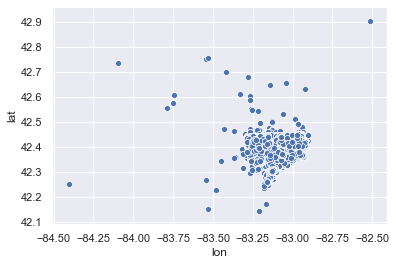

In [114]:
sns.scatterplot(x=train.lon, y = train.lat)

In [115]:
train = train[~((train.lon < -84.0) | (train.lon > -82.7))]

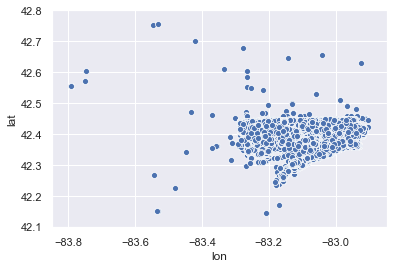

In [116]:
sns.scatterplot(x=train.lon, y = train.lat)

In [117]:
train.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status', 'compliance',
       'address', 'lat', 'lon'],
      dtype='object')

## Removing features from both the test and train set

In [118]:
Features_to_be_removed = ['mailing_address_str_name', 'violation_description','address', 'grafitti_status','violation_street_number', 'violation_street_name',
                         'inspector_name', 'violator_name', 'violation_zip_code', 'mailing_address_str_number','non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date', 'city', 'state', 'zip_code']


In [119]:
train.drop(Features_to_be_removed, axis =1, inplace = True)



In [120]:
len(train.columns)

14

In [121]:
train.drop('ticket_id', axis =1 , inplace= True)

In [122]:
train.columns

Index(['agency_name', 'violation_code', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'compliance', 'lat', 'lon'],
      dtype='object')

In [123]:
test.drop(Features_to_be_removed, axis = 1, inplace=True)

In [124]:
test.columns

Index(['ticket_id', 'agency_name', 'violation_code', 'disposition',
       'fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'lat', 'lon'],
      dtype='object')

In [125]:
ticket_ID = test.ticket_id

In [126]:
test.drop('ticket_id', axis =1 , inplace= True)

In [127]:
len(test.columns)

12

In [128]:
len(train.columns)

13

## Encoding the Categorical Variables

In [129]:
unique_feature(train)

,Features,No of Unique variables
1,violation_code,189
0,agency_name,5
2,disposition,4


In [130]:
unique_feature(test)

,Features,No of Unique variables
1,violation_code,151
2,disposition,8
0,agency_name,3


In [131]:
## Agency name
print('Train Agency name:\n',train.agency_name.value_counts())
print('\nTest Agency name:\n',test.agency_name.value_counts())

Train Agency name:
 Buildings, Safety Engineering & Env Department    95858
Department of Public Works                        52433
Health Department                                  7107
Detroit Police Department                          4464
Neighborhood City Halls                               1
Name: agency_name, dtype: int64

Test Agency name:
 Department of Public Works                        40731
Buildings, Safety Engineering & Env Department    16832
Detroit Police Department                          3438
Name: agency_name, dtype: int64


In [132]:
# Disposition 
print('Train Disposition:\n',train.disposition.value_counts())
print('\nTest Disposition:\n',test.disposition.value_counts())

Train Disposition:
 Responsible by Default                138325
Responsible by Admission               13699
Responsible by Determination            7644
Responsible (Fine Waived) by Deter       195
Name: disposition, dtype: int64

Test Disposition:
 Responsible by Default                51602
Responsible by Admission               4484
Responsible by Determination           4124
Responsible (Fine Waived) by Deter      781
Responsible - Compl/Adj by Default        6
Responsible - Compl/Adj by Determi        2
Responsible by Dismissal                  1
Responsible (Fine Waived) by Admis        1
Name: disposition, dtype: int64


In [133]:
test.disposition.replace('Responsible - Compl/Adj by Default', 'Responsible by Default', inplace = True)
test.disposition.replace('Responsible - Compl/Adj by Determi', 'Responsible by Determination', inplace = True)
test.disposition.replace('Responsible (Fine Waived) by Admis', 'Responsible (Fine Waived) by Deter', inplace= True)
test.disposition.value_counts()

Responsible by Default                51608
Responsible by Admission               4484
Responsible by Determination           4126
Responsible (Fine Waived) by Deter      782
Responsible by Dismissal                  1
Name: disposition, dtype: int64

### Dealing with Violation code

In [134]:
train.violation_code.value_counts()

9-1-36(a)              64410
9-1-81(a)              23144
22-2-88                19073
9-1-104                16920
22-2-88(b)              4877
                       ...  
22-2-85                    1
61-118.0100/32.0066        1
9-1-310                    1
61-4-35                    1
61-120.0100/32.0066        1
Name: violation_code, Length: 189, dtype: int64

In [135]:
violation_code_stats = train.groupby('violation_code')['violation_code'].agg('count').sort_values(ascending = False)
violation_code_stats_less_than_50 =violation_code_stats[violation_code_stats <50]
len(violation_code_stats_less_than_50)

145

In [136]:
violation_code_test = test.groupby('violation_code')['violation_code'].agg('count').sort_values(ascending = False)
violation_code_test_less_than_50 =violation_code_test[violation_code_test <50]
len(violation_code_test_less_than_50)

116

In [137]:
train.violation_code = train.violation_code.apply(lambda x: 'others' if x in violation_code_stats_less_than_50 else x)
test.violation_code = test.violation_code.apply(lambda x: 'others' if x in violation_code_test_less_than_50 else x)

In [138]:
cat_feat = train.select_dtypes(include=[np.object]).columns
cat_feat

Index(['agency_name', 'violation_code', 'disposition'], dtype='object')

In [139]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown= 'ignore')

In [140]:
from sklearn.model_selection import train_test_split
X = train.drop('compliance', axis = 1)
y = train.compliance.values

In [141]:
missing_values(train)

The selected dataset has 13 columns and 159863 rows.
There are 0 columns that have missing values.


,Missing Values,% of Total values


In [142]:
missing_values(test)

The selected dataset has 12 columns and 61001 rows.
There are 2 columns that have missing values.


,Missing Values,% of Total values
lat,5,0.01
lon,5,0.01


In [143]:
test.lat = test.lat.fillna(np.mean(test.lat))
test.lon = test.lon.fillna(np.mean(test.lon))

In [144]:
missing_values(test)

The selected dataset has 12 columns and 61001 rows.
There are 0 columns that have missing values.


,Missing Values,% of Total values


In [145]:
valid = test.copy()

In [146]:
ohe.fit(X[cat_feat])
X = ohe.transform(X[cat_feat]).toarray()
valid = ohe.transform(valid[cat_feat]).toarray()

In [147]:
valid

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [148]:
X.shape

(159863, 54)

In [149]:
valid.shape

(61001, 54)

In [151]:
from sklearn.preprocessing import KBinsDiscretizer,PowerTransformer,MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

## Running the base Model

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_stae = 42,stratify = y )
scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)
seed = 445
models = []
models.append(('RF', RandomForestClassifier(class_weight= {0: 1, 1:13}, random_state= 4332, n_jobs = -1)))
models.append(('LR', LogisticRegression(class_weight = {0: 0.05, 1:0.95}, C = 10,  n_jobs = -1)))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('EE', ExtraTreesClassifier()))
models.append(('GBR', GradientBoostingClassifier()))
results = []
names = []
for name, model in models:
    kfold = RepeatedStratifiedKFold(n_splits=5, random_state=seed)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='roc_auc',  n_jobs = -1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict_proba(X_test_scaled)[:, 1]
    print('{} Test ROC_AUC results: {}'.format(name, roc_auc_score(y_test, y_pred)))

RF: 0.774028 (0.005898)
RF Test ROC_AUC results: 0.7697166183313132
LR: 0.771313 (0.005695)
LR Test ROC_AUC results: 0.7667260751074803
Tree: 0.774349 (0.005827)
Tree Test ROC_AUC results: 0.7695147194046957
EE: 0.774445 (0.005866)
EE Test ROC_AUC results: 0.7694905237323579
GBR: 0.775858 (0.005760)
GBR Test ROC_AUC results: 0.770314623679171


## Tune the hyperparamater of the best two model

GradientBoostingClassifier()

In [157]:
train.compliance.value_counts()[1]

11595

In [161]:
weight = (train.compliance.value_counts()[0]) / (train.compliance.value_counts()[1])
weight

12.78723587753342

In [ ]:
 'learning_rate':[0.01, 0.05, 0.1], 'subsample': [0.8, 1.0], 'n_estimators':[100, 200, 300], 'max_features':[8, 9, 10]

In [ ]:
## Gradient_boosting
seed = 455
kfold =RepeatedStratifiedKFold(n_splits=10, random_state=seed)
gsc = GridSearchCV(
        estimator = GradientBoostingClassifier(random_state = seed),
        param_grid= {'max_depth':[3, 6, 8]},
        scoring = 'roc_auc', n_jobs = -1, cv = kfold)
grid_result =gsc.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_result.best_params_))

In [165]:
unique_feature(test)

,Features,No of Unique variables
1,violation_code,36
2,disposition,5
0,agency_name,3


In [167]:
unique_feature(train)

,Features,No of Unique variables
1,violation_code,45
0,agency_name,5
2,disposition,4


In [168]:
test.head()

,agency_name,violation_code,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,lat,lon
0,Department of Public Works,22-2-61,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,42.407581,-82.986642
1,Department of Public Works,22-2-88(b),Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,42.426239,-83.238259
2,Department of Public Works,22-2-43,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,42.426239,-83.238259
3,Department of Public Works,22-2-88(b),Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,42.309661,-83.122426
4,Department of Public Works,22-2-45,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,42.308830,-83.121116


In [169]:
train.head()

,agency_name,violation_code,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,compliance,lat,lon
0,"Buildings, Safety Engineering & Env Department",9-1-36(a),Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,42.390729,-83.124268
1,"Buildings, Safety Engineering & Env Department",9-1-36(a),Responsible by Default,500.0,20.0,10.0,50.0,0.0,0.0,580.0,0.0,42.390729,-83.124268
2,"Buildings, Safety Engineering & Env Department",9-1-81(a),Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,42.390729,-83.124268
4,Department of Public Works,9-1-105,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,0.0,42.390729,-83.124268
5,"Buildings, Safety Engineering & Env Department",19450901,Responsible by Default,300.0,20.0,10.0,30.0,0.0,0.0,360.0,0.0,42.390729,-83.124268


In [173]:
test.select_dtypes(include = [np.object]).columns

Index(['agency_name', 'violation_code', 'disposition'], dtype='object')

In [224]:
valid = test.copy()

In [228]:
X = train.drop('compliance', axis = 1)
y = train.compliance.values

In [229]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe = OneHotEncoder(handle_unknown= 'ignore')

In [230]:
cat_feat

Index(['agency_name', 'violation_code', 'disposition'], dtype='object')

In [231]:
train_cat = X[cat_feat]
test_cat = valid[cat_feat]
train_cat = ohe.fit_transform(train_cat).toarray()
test_cat = ohe.transform(test_cat).toarray()

In [232]:
X = X.reset_index(drop = True)

In [233]:
train_cat = pd.DataFrame(train_cat)
test_cat = pd.DataFrame(test_cat)

In [234]:
X = X.join(train_cat)
valid = valid.join(test_cat)

In [235]:
X.isnull().sum()

agency_name       0
violation_code    0
disposition       0
fine_amount       0
admin_fee         0
                 ..
49                0
50                0
51                0
52                0
53                0
Length: 66, dtype: int64

In [236]:
valid.isnull().sum()

agency_name       0
violation_code    0
disposition       0
fine_amount       0
admin_fee         0
                 ..
49                0
50                0
51                0
52                0
53                0
Length: 66, dtype: int64

In [237]:
train_cat.shape

(159863, 54)

In [238]:
test_cat.shape

(61001, 54)

In [239]:
X.head()

,agency_name,violation_code,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,...,44,45,46,47,48,49,50,51,52,53
0,"Buildings, Safety Engineering & Env Department",9-1-36(a),Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"Buildings, Safety Engineering & Env Department",9-1-36(a),Responsible by Default,500.0,20.0,10.0,50.0,0.0,0.0,580.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,"Buildings, Safety Engineering & Env Department",9-1-81(a),Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Department of Public Works,9-1-105,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,"Buildings, Safety Engineering & Env Department",19450901,Responsible by Default,300.0,20.0,10.0,30.0,0.0,0.0,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [241]:
X.drop(cat_feat, axis = 1, inplace= True)
valid.drop(cat_feat, axis = 1, inplace= True)

In [242]:
X.head()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,lat,lon,0,...,44,45,46,47,48,49,50,51,52,53
0,250.0,20.0,10.0,25.0,0.0,0.0,305.0,42.390729,-83.124268,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,500.0,20.0,10.0,50.0,0.0,0.0,580.0,42.390729,-83.124268,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,250.0,20.0,10.0,25.0,0.0,0.0,305.0,42.390729,-83.124268,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,100.0,20.0,10.0,10.0,0.0,0.0,140.0,42.390729,-83.124268,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,300.0,20.0,10.0,30.0,0.0,0.0,360.0,42.390729,-83.124268,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,stratify = y )
scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)
seed = 445
models = []
models.append(('RF', RandomForestClassifier(class_weight ={0:1, 1:13}, n_jobs = -1, random_state = seed)))
models.append(('LR', LogisticRegression(class_weight = {0:1, 1:13}, C = 10,  n_jobs = -1)))
models.append(('Tree', DecisionTreeClassifier(random_state = 1)))
models.append(('EE', ExtraTreesClassifier(random_state = 443)))
models.append(('GBR', GradientBoostingClassifier(random_state = 544 )))
results = []
names = []
for name, model in models:
    kfold = RepeatedStratifiedKFold(n_splits=5, random_state=seed)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='roc_auc',  n_jobs = -1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict_proba(X_test_scaled)[:, 1]
    print('{} Test ROC_AUC results: {}'.format(name, roc_auc_score(y_test, y_pred)))

RF: 0.774056 (0.004900)
RF Test ROC_AUC results: 0.7680451207970337
LR: 0.799318 (0.005457)
LR Test ROC_AUC results: 0.793346921560878
Tree: 0.661612 (0.004728)
Tree Test ROC_AUC results: 0.6650952058294671
EE: 0.762140 (0.005663)
EE Test ROC_AUC results: 0.757611625826993
GBR: 0.813093 (0.005182)
GBR Test ROC_AUC results: 0.8079001950478288


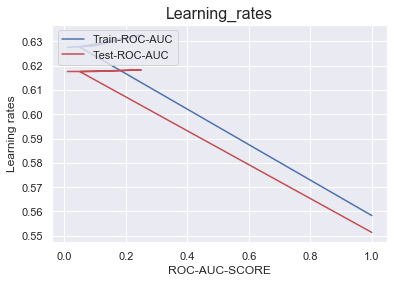

In [253]:
from sklearn.metrics import roc_curve, auc
learning_rates = [0.01, 0.1, 0.25, 0.05, 1]
train_results = []
test_results = []
for eta in learning_rates:
    gbr = GradientBoostingClassifier(learning_rate=eta)
    gbr.fit(X_train_scaled, y_train)
    train_pred = gbr.predict(X_train_scaled)
    score = roc_auc_score(y_train, train_pred)
    train_results.append(score)
    
    y_pred = gbr.predict(X_test_scaled)
    score = roc_auc_score(y_test, y_pred)
    test_results.append(score)

plt.plot(learning_rates, train_results, 'b', label = 'Train-ROC-AUC')
plt.plot(learning_rates, test_results, 'r', label = 'Test-ROC-AUC')
plt.legend(loc=2, fontsize=11)
plt.xlabel('ROC-AUC-SCORE')
plt.ylabel('Learning rates')
plt.title('Learning_rates', fontsize=16)
plt.show()

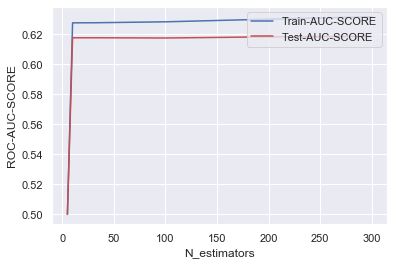

In [256]:
n_estimators = [5, 10, 32, 100, 200, 300]
train_results = []
test_results = []
for estimator in n_estimators:
    gbr = GradientBoostingClassifier(n_estimators=estimator)
    gbr.fit(X_train_scaled, y_train)
    train_pred = gbr.predict(X_train_scaled)
    fpr_, tpr_, _ = roc_curve(y_train, train_pred)
    roc_auc_ = auc(fpr_, tpr_)
    train_results.append(roc_auc_)
    
    y_pred = gbr.predict(X_test_scaled)
    fpr_, tpr_, _ = roc_curve(y_test, y_pred)
    roc_auc_ = auc(fpr_, tpr_)
    test_results.append(roc_auc_)

plt.plot(n_estimators, train_results, 'b', label = 'Train-AUC-SCORE')
plt.plot(n_estimators, test_results, 'r', label = 'Test-AUC-SCORE')
plt.legend(loc="upper right", fontsize=11)
plt.xlabel('N_estimators')
plt.ylabel('ROC-AUC-SCORE')
plt.show()

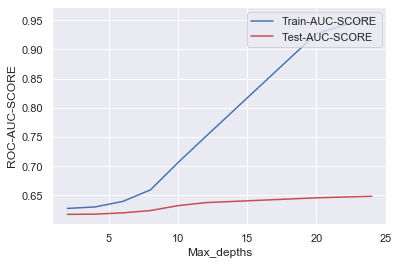

In [258]:
max_depths = [2,4,6,8,10,12,20,24]
train_results = []
test_results = []
for max_depth in max_depths:
    gbr = GradientBoostingClassifier(max_depth=max_depth)
    gbr.fit(X_train_scaled, y_train)
    train_pred = gbr.predict(X_train_scaled)
    fpr_, tpr_, _ = roc_curve(y_train, train_pred)
    roc_auc_ = auc(fpr_, tpr_)
    train_results.append(roc_auc_)
    
    y_pred = gbr.predict(X_test_scaled)
    fpr_, tpr_, _ = roc_curve(y_test, y_pred)
    roc_auc_ = auc(fpr_, tpr_)
    test_results.append(roc_auc_)

plt.plot(max_depths, train_results, 'b', label = 'Train-AUC-SCORE')
plt.plot(max_depths, test_results, 'r', label = 'Test-AUC-SCORE')
plt.legend(loc="upper right", fontsize=11)
plt.xlabel('Max_depths')
plt.ylabel('ROC-AUC-SCORE')
plt.show()

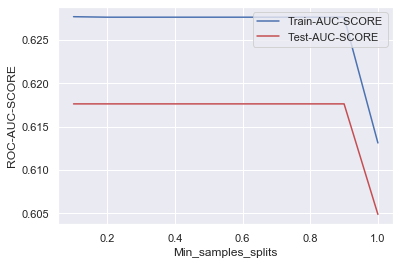

In [264]:
min_samples_splits = np.linspace(0.1, 1, 10, endpoint = 1)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    gbr = GradientBoostingClassifier(min_samples_split= min_samples_split)
    gbr.fit(X_train_scaled, y_train)
    train_pred = gbr.predict(X_train_scaled)
    fpr_, tpr_, _ = roc_curve(y_train, train_pred)
    roc_auc_ = auc(fpr_, tpr_)
    train_results.append(roc_auc_)
    
    y_pred = gbr.predict(X_test_scaled)
    fpr_, tpr_, _ = roc_curve(y_test, y_pred)
    roc_auc_ = auc(fpr_, tpr_)
    test_results.append(roc_auc_)

plt.plot(min_samples_splits, train_results, 'b', label = 'Train-AUC-SCORE')
plt.plot(min_samples_splits, test_results, 'r', label = 'Test-AUC-SCORE')
plt.legend(loc="upper right", fontsize=11)
plt.xlabel('Min_samples_splits')
plt.ylabel('ROC-AUC-SCORE')
plt.show()

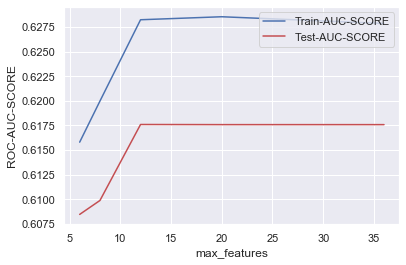

In [265]:
max_features = [6, 8, 12, 20, 36]
train_results = []
test_results = []
for max_feature in max_features:
    gbr = GradientBoostingClassifier(max_features= max_feature)
    gbr.fit(X_train_scaled, y_train)
    train_pred = gbr.predict(X_train_scaled)
    fpr_, tpr_, _ = roc_curve(y_train, train_pred)
    roc_auc_ = auc(fpr_, tpr_)
    train_results.append(roc_auc_)
    
    y_pred = gbr.predict(X_test_scaled)
    fpr_, tpr_, _ = roc_curve(y_test, y_pred)
    roc_auc_ = auc(fpr_, tpr_)
    test_results.append(roc_auc_)

plt.plot(max_features, train_results, 'b', label = 'Train-AUC-SCORE')
plt.plot(max_features, test_results, 'r', label = 'Test-AUC-SCORE')
plt.legend(loc="upper right", fontsize=11)
plt.xlabel('max_features')
plt.ylabel('ROC-AUC-SCORE')
plt.show()

In [281]:
clf = GradientBoostingClassifier()
clf.fit(X_train_scaled, y_train)


GradientBoostingClassifier()

In [282]:
train_pred =clf.predict_proba(X_train_scaled)[:,1]
y_pred = clf.predict_proba(X_test_scaled)[:, 1]
print('Train ROC_AUC results: {}'.format( roc_auc_score(y_train, train_pred)))
print('Test ROC_AUC results: {}'.format(roc_auc_score(y_test, y_pred)))

Train ROC_AUC results: 0.8173032903685425
Test ROC_AUC results: 0.8077529038924722


In [283]:
clf_un = GradientBoostingClassifier()
clf_un.fit(X_train, y_train)
train_pred =clf_un.predict_proba(X_train)[:,1]
y_pred = clf_un.predict_proba(X_test)[:, 1]
print('Train ROC_AUC results: {}'.format( roc_auc_score(y_train, train_pred)))
print('Test ROC_AUC results: {}'.format(roc_auc_score(y_test, y_pred)))

Train ROC_AUC results: 0.8175574299857836
Test ROC_AUC results: 0.8085357129938382


In [307]:
ran_tree = RandomForestClassifier(n_estimators = 100, max_depth = 8, class_weight={0:1,1:13},max_features = 10, random_state= 422)
ran_tree.fit(X_train, y_train)
train_pred =ran_tree.predict_proba(X_train)[:,1]
y_pred = ran_tree.predict_proba(X_test)[:, 1]
print('Train ROC_AUC results: {}'.format( roc_auc_score(y_train, train_pred)))
print('Test ROC_AUC results: {}'.format(roc_auc_score(y_test, y_pred)))

Train ROC_AUC results: 0.819619375659682
Test ROC_AUC results: 0.8062787220661078


In [306]:
log_clf = LogisticRegression(class_weight = {0:1, 1:13}, C = 10,  n_jobs = -1)
log_clf.fit(X_train, y_train)
train_pred =log_clf.predict_proba(X_train)[:,1]
y_pred = log_clf.predict_proba(X_test)[:, 1]
print('Train ROC_AUC results: {}'.format( roc_auc_score(y_train, train_pred)))
print('Test ROC_AUC results: {}'.format(roc_auc_score(y_test, y_pred)))

Train ROC_AUC results: 0.7988696707381208
Test ROC_AUC results: 0.7908941783379069


In [308]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

log_clf = LogisticRegression(class_weight = {0:1, 1:13}, C = 10,  n_jobs = -1)
gbt_clf = GradientBoostingClassifier(random_state= 422)
ran_clf = RandomForestClassifier(n_estimators = 100, max_depth = 8, class_weight={0:1,1:13},max_features = 10, random_state= 422)

voting_clf = VotingClassifier(estimators = [('lr', log_clf), ('random', ran_clf), ('gbt', gbt_clf)], voting = 'soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10,
                                                 class_weight={0: 1, 1: 13},
                                                 n_jobs=-1)),
                             ('random',
                              RandomForestClassifier(class_weight={0: 1, 1: 13},
                                                     max_depth=8,
                                                     max_features=10,
                                                     random_state=422)),
                             ('gbt',
                              GradientBoostingClassifier(random_state=422))],
                 voting='soft')

In [309]:
from sklearn.metrics import accuracy_score

for clf in [log_clf, ran_clf, gbt_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    print(clf.__class__.__name__,roc_auc_score(y_test, y_pred))

LogisticRegression 0.7908941783379069
RandomForestClassifier 0.8062787220661078
GradientBoostingClassifier 0.808531590423513
VotingClassifier 0.8049371139120993


In [310]:
seed = 445
models = []
models.append(('RF',RandomForestClassifier(n_estimators = 100, max_depth = 8, class_weight={0:1,1:13},max_features = 10, random_state= 422) ))
models.append(('LR', LogisticRegression(class_weight = {0:1, 1:13}, C = 10,  n_jobs = -1)))
models.append(('GBR', GradientBoostingClassifier(random_state = 544 )))
models.append(('VR',VotingClassifier(estimators = [('lr', log_clf), ('random', ran_clf), ('gbt', gbt_clf)], voting = 'soft')))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc',  n_jobs = -1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.804547 (0.025468)
LR: 0.791144 (0.030763)
GBR: 0.806307 (0.024717)
VR: 0.805160 (0.025643)


In [314]:
valid.head()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,lat,lon,0,...,44,45,46,47,48,49,50,51,52,53
0,200.0,20.0,10.0,20.0,0.0,0.0,250.0,42.407581,-82.986642,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,42.426239,-83.238259,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100.0,20.0,10.0,10.0,0.0,0.0,140.0,42.426239,-83.238259,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,200.0,20.0,10.0,20.0,0.0,0.0,250.0,42.309661,-83.122426,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,100.0,20.0,10.0,10.0,0.0,0.0,140.0,42.308830,-83.121116,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [315]:
test.head()

,agency_name,violation_code,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,lat,lon
0,Department of Public Works,22-2-61,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,42.407581,-82.986642
1,Department of Public Works,22-2-88(b),Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,42.426239,-83.238259
2,Department of Public Works,22-2-43,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,42.426239,-83.238259
3,Department of Public Works,22-2-88(b),Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,42.309661,-83.122426
4,Department of Public Works,22-2-45,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,42.308830,-83.121116


In [316]:
df = pd.Series(gbt_clf.predict_proba(valid)[:,1], ticket_ID)
df

ticket_id
284932    0.099618
285362    0.017205
285361    0.048761
285338    0.057972
285346    0.057179
            ...   
376496    0.015449
376497    0.015449
376499    0.063901
376500    0.063901
369851    0.735564
Length: 61001, dtype: float64

In [318]:

def blight_model():
    import pandas as pd
    import numpy as np
    
    # Your code here
    train = pd.read_csv('./train.csv',encoding='latin1' )
    test = pd.read_csv('./test.csv', encoding='latin1')
    address = pd.read_csv('./addresses.csv', encoding='latin1')
    lat = pd.read_csv('./latlons.csv' ,encoding='latin1')
    
    ## Merging the train and test dataset with the latitude and address
    new_train = pd.merge(train, address, on = 'ticket_id')
    train = pd.merge(new_train, lat, on = 'address')
    
    new_test = pd.merge(test, address, on = 'ticket_id')
    test = pd.merge(new_test, lat, on = 'address')
    
    # Delete the features that are not present in Test set
    Features_drop_from_train_dataset = ['payment_amount', 'payment_date',
                                        'payment_status', 'balance_due', 
                                        'collection_status', 'compliance_detail' ]
    train.drop(Features_drop_from_train_dataset, axis = 1, inplace = True)
    
    # Remove the null part of the target
    train = train[~train.compliance.isnull()]
    
    # Remove from train set which is not  USA
    train = train[train.country == 'USA']
    
    # From careful observation, it was shown that the state which is not Michigan has almost the same address as Michigan, thus I suggest the state were all Michigan but to ensure the data is messy different state is imputed.
    # And also after careful online search of cities in MI, it was discovered that there are over 1357 cities, thus it will also be discarded.
    # The only feature which talks about location lat and lon will be used for the continuation of the prediction
    
    # Remove lat and lon outliers
    train = train[train.lat < 44.5]
    train = train[~((train.lon < -84.0) | (train.lon > -82.7))]
    
    # Features to be removed from both the train and test set
    Features_to_be_removed = ['mailing_address_str_name', 'violation_description','address', 'grafitti_status',
                              'violation_street_number', 'violation_street_name',
                         'inspector_name', 'violator_name', 'violation_zip_code',
                              'mailing_address_str_number','non_us_str_code', 'country', 
                              'ticket_issued_date', 'hearing_date', 'city', 'state', 'zip_code']
    train.drop(Features_to_be_removed, axis =1, inplace = True)
    
    # Remove the ticket_id from the train set only
    train.drop('ticket_id', axis =1 , inplace= True)
    test.drop(Features_to_be_removed, axis = 1, inplace=True)
    
    # Create a variable for the test ticket_ID
    ticket_ID = test.ticket_id

    # Drop the test ticket_id
    test.drop('ticket_id', axis =1 , inplace= True)
    
    # Dealing with categorical variables left
    test.disposition.replace('Responsible - Compl/Adj by Default', 'Responsible by Default', inplace = True)
    test.disposition.replace('Responsible - Compl/Adj by Determi', 'Responsible by Determination', inplace = True)
    test.disposition.replace('Responsible (Fine Waived) by Admis', 'Responsible (Fine Waived) by Deter', inplace= True)
    test.disposition.value_counts()
    
    violation_code_stats = train.groupby('violation_code')['violation_code'].agg('count').sort_values(ascending = False)
    violation_code_stats_less_than_50 =violation_code_stats[violation_code_stats <50]
    
    violation_code_test = test.groupby('violation_code')['violation_code'].agg('count').sort_values(ascending = False)
    violation_code_test_less_than_50 =violation_code_test[violation_code_test <50]
    
    train.violation_code = train.violation_code.apply(lambda x: 'others' if x in violation_code_stats_less_than_50 else x)
    test.violation_code = test.violation_code.apply(lambda x: 'others' if x in violation_code_test_less_than_50 else x)
    
    test.lat = test.lat.fillna(np.mean(test.lat))
    test.lon = test.lon.fillna(np.mean(test.lon))
    # Getting the categorical features for encoding
    cat_feat = train.select_dtypes(include=[np.object]).columns

    
    # import the encoder OneHotEncoder
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(handle_unknown= 'ignore')
    
    # Fitting the encoder to the categorical variables
    X = train.drop('compliance', axis = 1)
    y = train.compliance.values
    
    valid = test.copy()
    train_cat = X[cat_feat]
    test_cat = valid[cat_feat]
    train_cat = ohe.fit_transform(train_cat).toarray()
    test_cat = ohe.transform(test_cat).toarray()
    
    X = X.reset_index(drop = True)
    train_cat = pd.DataFrame(train_cat)
    test_cat = pd.DataFrame(test_cat)
    
    X = X.join(train_cat)
    valid = valid.join(test_cat)
    
    # Drop the categorical variable after encoding
    X.drop(cat_feat, axis = 1, inplace= True)
    valid.drop(cat_feat, axis = 1, inplace= True)
    
    # Import the algorithm and the metrics score
    from sklearn.metrics import roc_auc_score
    from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
    
    gbt_clf = GradientBoostingClassifier(random_state= 422)
    gbt_clf.fit(X, y)
    
    df = pd.Series(gbt_clf.predict_proba(valid)[:,1], ticket_ID)
    return df
blight_model()

ticket_id
284932    0.094136
285362    0.016280
285361    0.046628
285338    0.059612
285346    0.085324
            ...   
376496    0.015875
376497    0.015875
376499    0.064833
376500    0.064833
369851    0.737373
Length: 61001, dtype: float64